<a href="https://colab.research.google.com/github/AlexanderSychev2005/stat_un/blob/main/stat_lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

In [23]:
x = np.array([5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0,
              10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 14.0, 18.0, 24.0, 30.0])
y = np.array([2.60, 2.30, 2.11, 2.01, 1.92, 1.82, 1.55, 1.34, 1.30, 1.28, 1.22,
              1.18, 1.12, 1.10, 0.98, 0.92, 0.90, 0.89, 0.88, 0.80, 0.79])
n = len(x)

In [24]:
print(f"Number of values: {n}")

Number of values: 21


Text(0.5, 1.0, 'Дані')

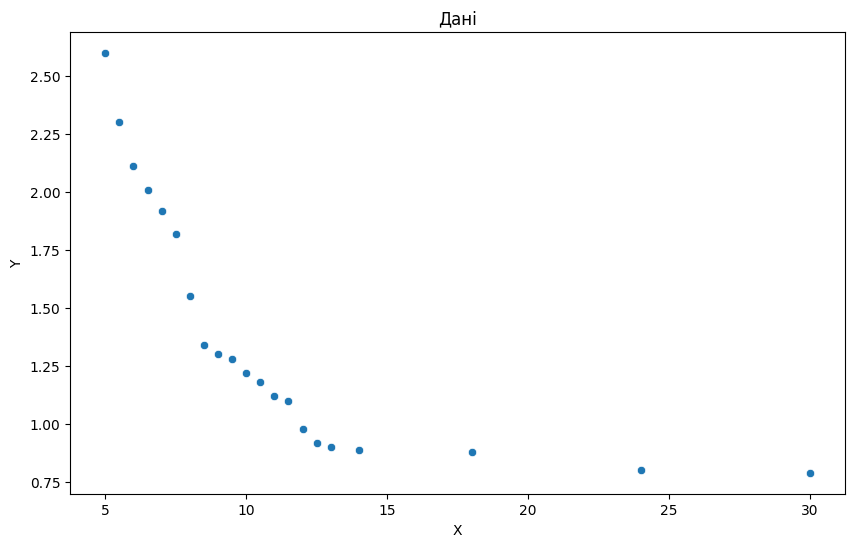

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Дані')

## 1. Точкові оцінки параметрів β0, β1 та графік регресії

In [26]:
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
beta_0, beta_1 = model.params
print(f"Оцінки параметрів: β0 = {beta_0:.4f}, β1 = {beta_1:.4f}")

Оцінки параметрів: β0 = 2.1100, β1 = -0.0640


In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     21.84
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           0.000166
Time:                        10:51:35   Log-Likelihood:                -8.2257
No. Observations:                  21   AIC:                             20.45
Df Residuals:                      19   BIC:                             22.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1100      0.176     11.974      0.000       1.741       2.479
x1            -0.0640      0.014     -4.673      0.000      -0.093      -0.035
==============================================================================
Omnibus:                        2.935   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.429
Skew:                           0.752   Prob(JB):                        0.297
Kurtosis:                       2.283   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Кореляційне поле та лінія регресії

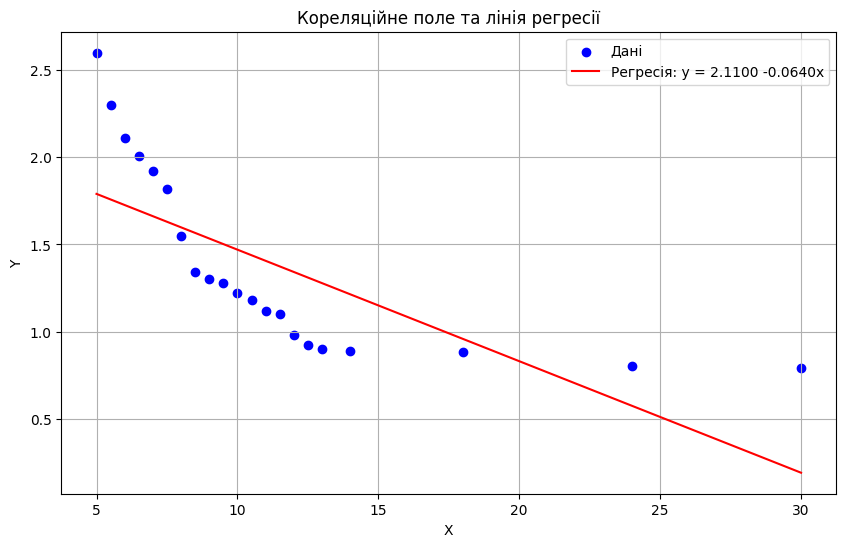

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Дані')
plt.plot(x, beta_0 + beta_1 * x, color='red', label=f'Регресія: y = {beta_0:.4f} {beta_1:+.4f}x')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Кореляційне поле та лінія регресії')
plt.legend()
plt.grid(True)
plt.show()

## 2. Довірчі інтервали для β0, β1 (γ = 0.99)

In [29]:
conf_int = model.conf_int(alpha=0.01)
print("\nДовірчі інтервали (γ = 0.99):")
print(f"β0: [{conf_int[0, 0]:.4f}, {conf_int[0, 1]:.4f}]")
print(f"β1: [{conf_int[1, 0]:.4f}, {conf_int[1, 1]:.4f}]")


Довірчі інтервали (γ = 0.99):
β0: [1.6058, 2.6141]
β1: [-0.1032, -0.0248]


In [30]:
conf_int

array([[ 1.60584282,  2.61406194],
       [-0.10320092, -0.02482418]])

## 3. Перевірка значущості β1 (α = 0.01)

In [31]:
p_value_beta1 = model.pvalues[1]
print("\nПеревірка значущості β1 (α = 0.01):")
print(f"p-value для β1 = {p_value_beta1:.4f}")
if p_value_beta1 < 0.01:
    print("β1 значущий (відхиляємо H0)")
else:
    print("β1 незначущий (не відхиляємо H0)")


Перевірка значущості β1 (α = 0.01):
p-value для β1 = 0.0002
β1 значущий (відхиляємо H0)


In [32]:
# 4. Довірчий інтервал для функції регресії (γ = 0.99)
x_pred = np.linspace(min(x), max(x), 100)
X_pred = sm.add_constant(x_pred)
pred = model.get_prediction(X_pred)
conf_int_reg = pred.conf_int(alpha=0.01)

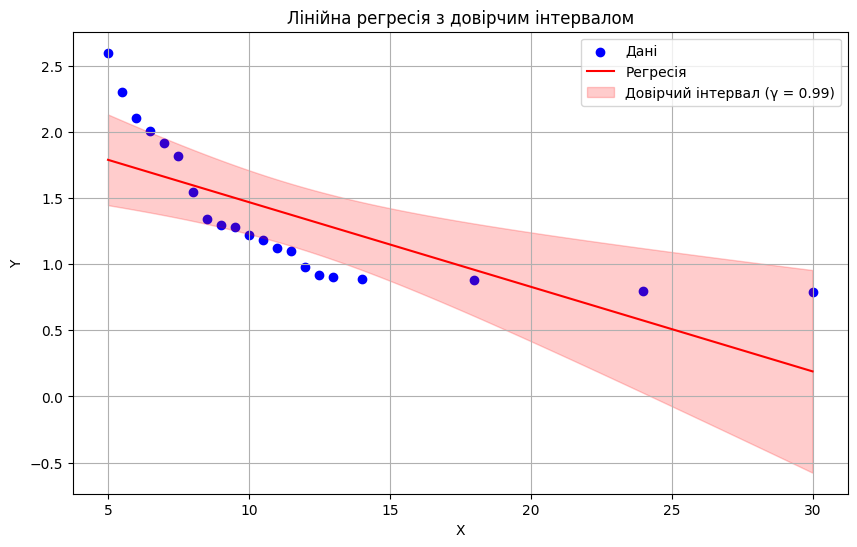

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Дані')
plt.plot(x_pred, beta_0 + beta_1 * x_pred, color='red', label='Регресія')
plt.fill_between(x_pred, conf_int_reg[:, 0], conf_int_reg[:, 1], color='red', alpha=0.2, label='Довірчий інтервал (γ = 0.99)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Лінійна регресія з довірчим інтервалом')
plt.legend()
plt.grid(True)
plt.show()

## 5. Парний коефіцієнт кореляції

In [34]:
r_xy = np.corrcoef(x, y)[0, 1]
print("\nПарний коефіцієнт кореляції:")
print(f"r_xy = {r_xy:.4f}")


Парний коефіцієнт кореляції:
r_xy = -0.7313


## 6. Довірчий інтервал для прогнозованих індивідуальних значень (γ = 0.99)

In [35]:
pred_ind = model.get_prediction(X_pred)
conf_int_ind = pred_ind.conf_int(alpha=0.01, obs=True)

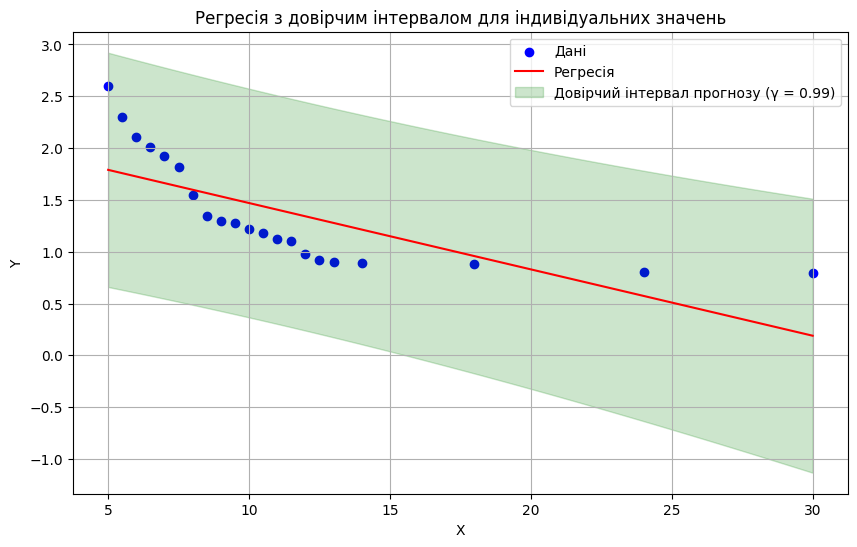

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Дані')
plt.plot(x_pred, beta_0 + beta_1 * x_pred, color='red', label='Регресія')
plt.fill_between(x_pred, conf_int_ind[:, 0], conf_int_ind[:, 1], color='green', alpha=0.2, label='Довірчий інтервал прогнозу (γ = 0.99)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Регресія з довірчим інтервалом для індивідуальних значень')
plt.legend()
plt.grid(True)
plt.show()